In [33]:
### 🔧 TAREA
#Explora el dataset e intenta responder:
#
#- ¿Qué variables tienen valores faltantes?
#- ¿Qué variables parecen más correlacionadas con el target?
#- ¿Hay valores extremos que deberías tratar?

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Configuración de estilo
sns.set(style="whitegrid")

In [36]:
# 📥 Cargar el dataset limpio
df = pd.read_csv("../data/credit_clean.csv")

# 👁️ Primer vistazo a los datos
df.head()

# 🧼 Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40016 entries, 0 to 40015
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      40016 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  40016 non-null  float64
 2   age                                   40016 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  40016 non-null  int64  
 4   DebtRatio                             40016 non-null  float64
 5   MonthlyIncome                         40016 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       40016 non-null  int64  
 7   NumberOfTimes90DaysLate               40016 non-null  int64  
 8   NumberRealEstateLoansOrLines          40016 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  40016 non-null  int64  
 10  NumberOfDependents                    40016 non-null  float64
dtypes: float64(4), 

Distribución del target:
SeriousDlqin2yrs
1    0.5002
0    0.4998
Name: proportion, dtype: float64


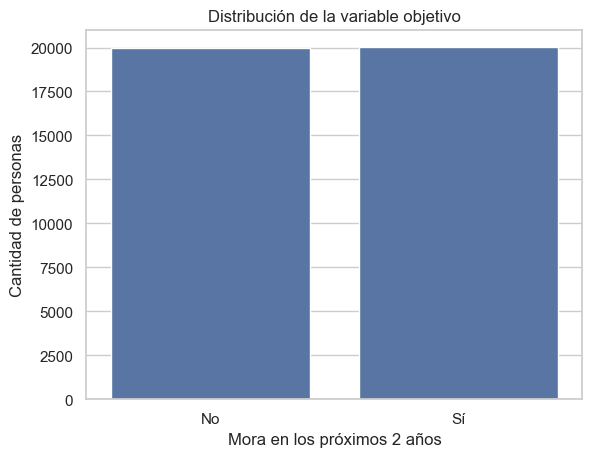

In [37]:
# 🔍 Distribución de la variable objetivo
target_counts = df["SeriousDlqin2yrs"].value_counts(normalize=True)
print("Distribución del target:")
print(target_counts)

sns.countplot(data=df, x="SeriousDlqin2yrs")
plt.title("Distribución de la variable objetivo")
plt.xlabel("Mora en los próximos 2 años")
plt.ylabel("Cantidad de personas")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

In [38]:
# 📊 Estadísticas descriptivas
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000
mean,0.500200,4.687565,49.267893,1.278888,331.312144,6057.155913,8.216263,1.055203,1.000925,0.920332,0.833742
std,0.500006,188.643899,14.293645,8.290821,2093.376551,6878.873207,5.400697,8.293279,1.267900,8.270203,1.165660
min,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.072469,39.000000,0.000000,0.182940,3550.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.441448,48.000000,0.000000,0.390770,5443.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.941515,59.000000,1.000000,0.868648,6812.750000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,29110.000000,101.000000,98.000000,326442.000000,699530.000000,57.000000,98.000000,29.000000,98.000000,9.000000


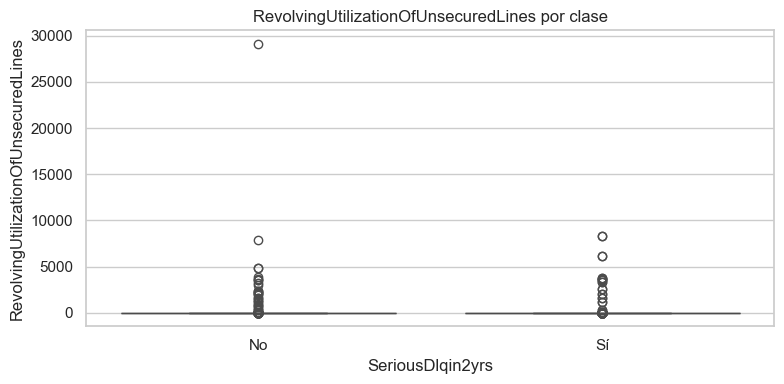

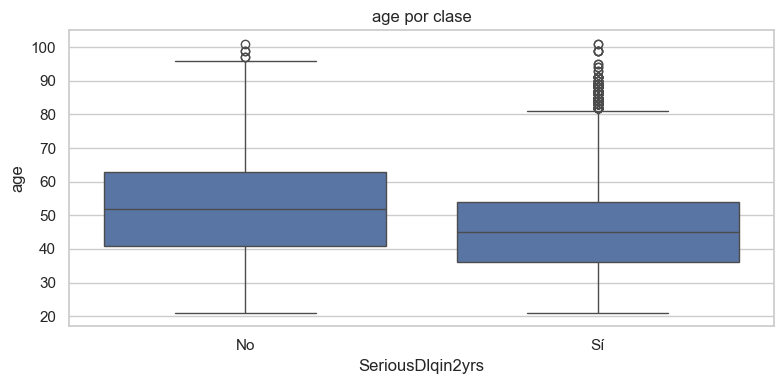

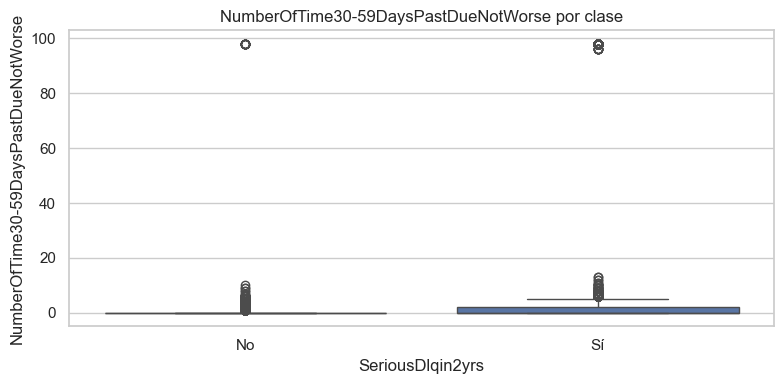

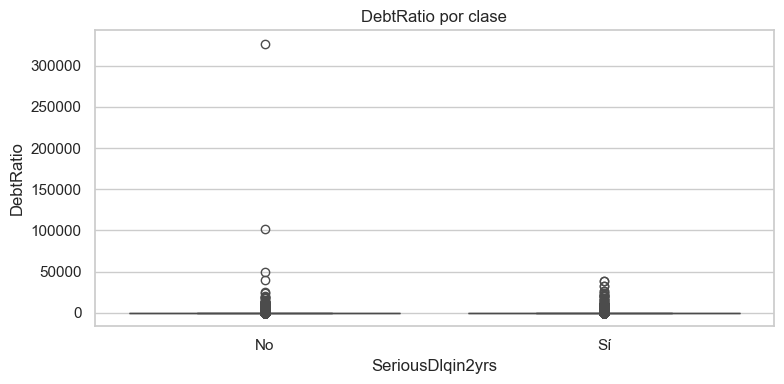

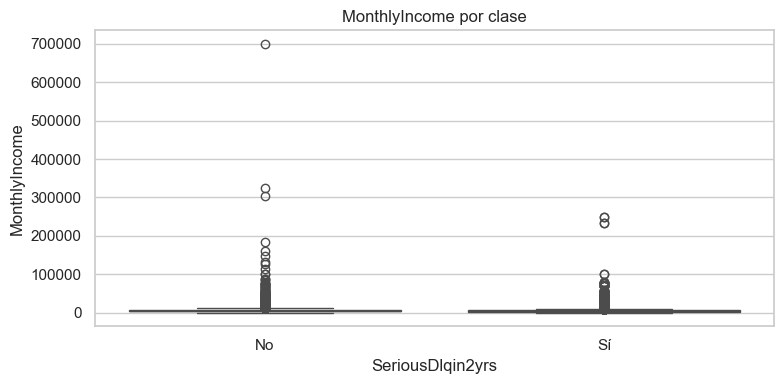

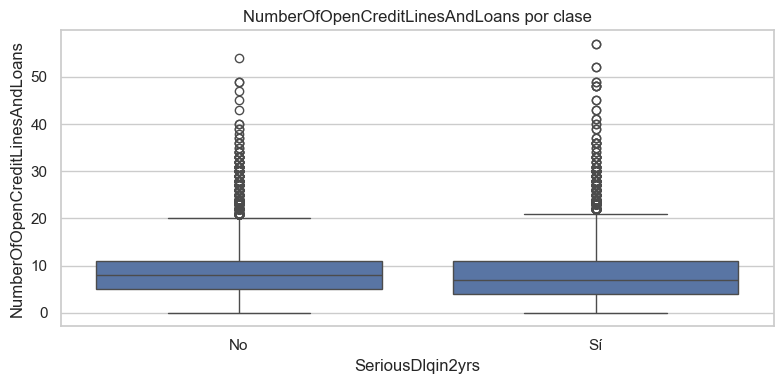

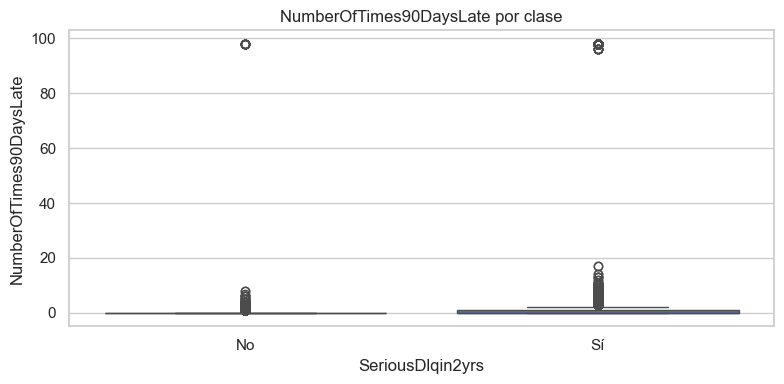

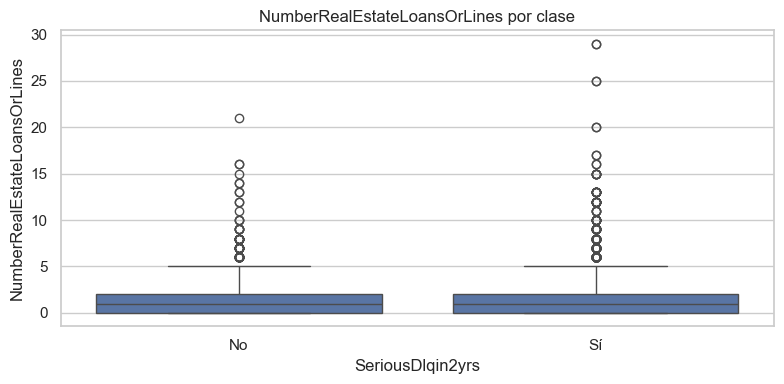

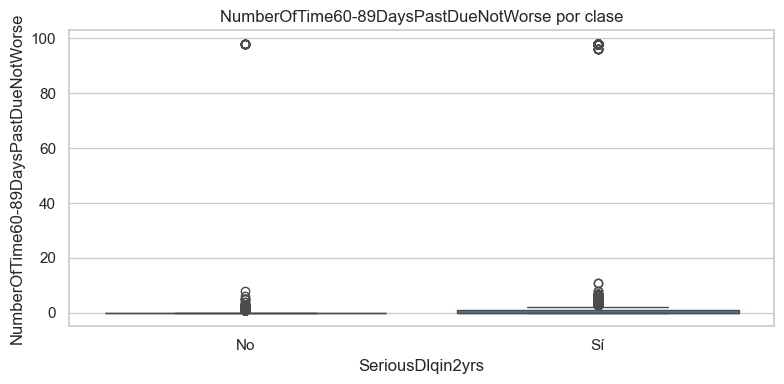

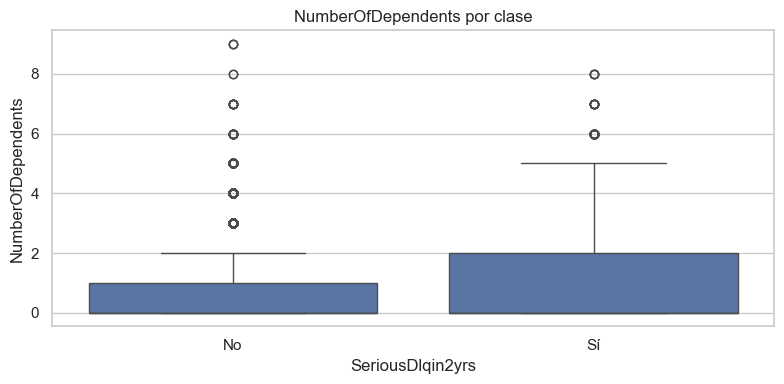

In [39]:
# 📉 Boxplots por variable numérica
for col in df.columns:
    if col != "SeriousDlqin2yrs":
        plt.figure(figsize=(8, 4))
        sns.boxplot(x="SeriousDlqin2yrs", y=col, data=df)
        plt.title(f"{col} por clase")
        plt.xticks([0, 1], ["No", "Sí"])
        plt.tight_layout()
        plt.show()

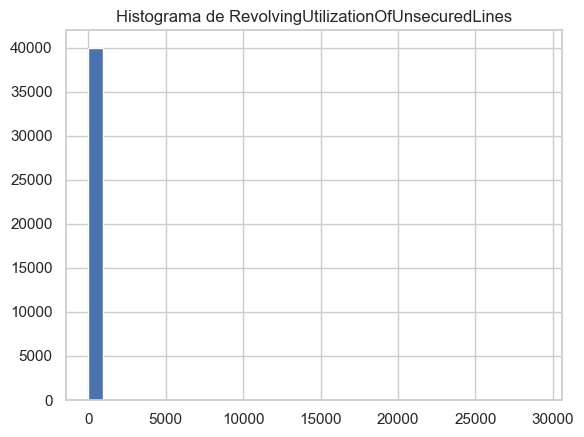

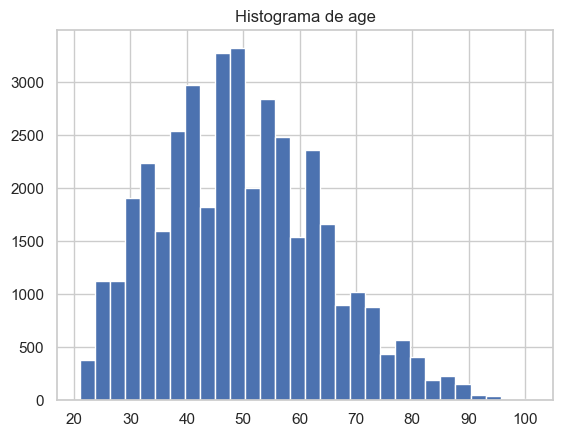

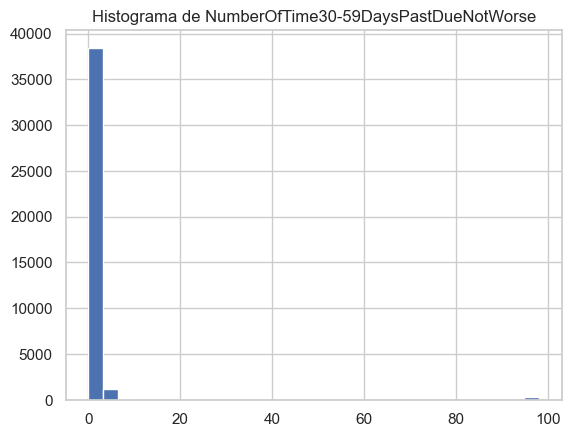

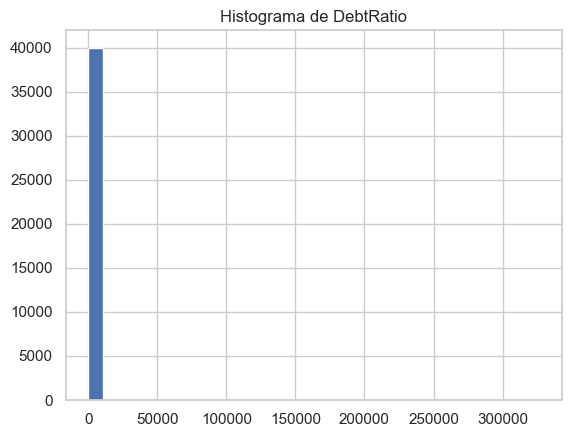

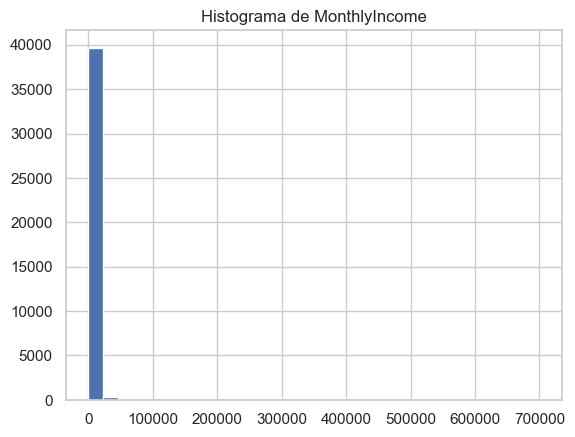

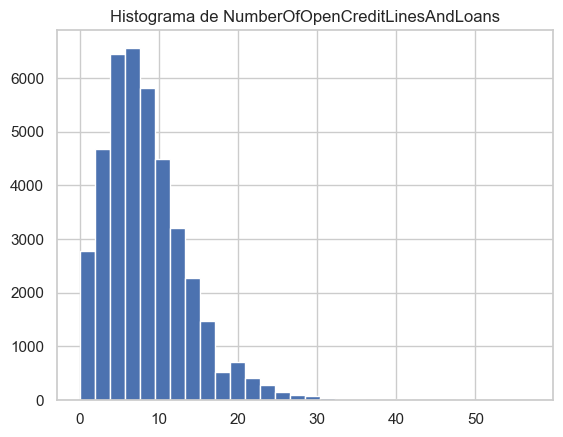

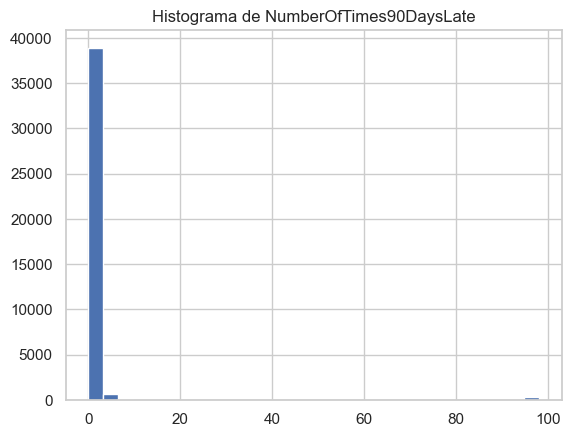

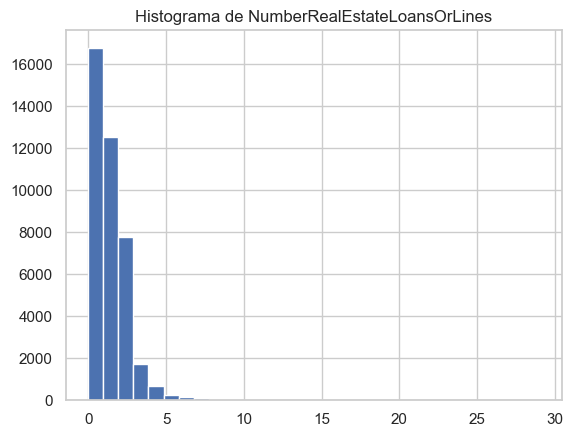

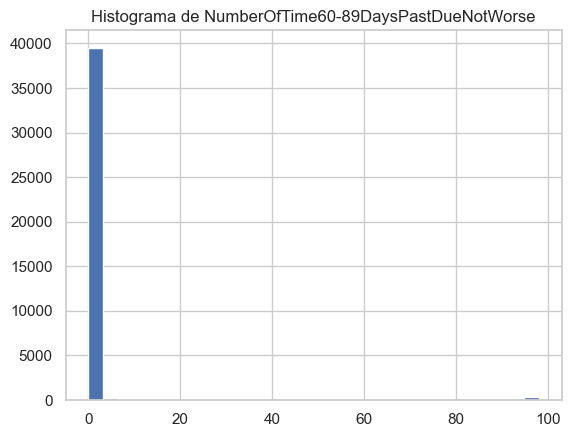

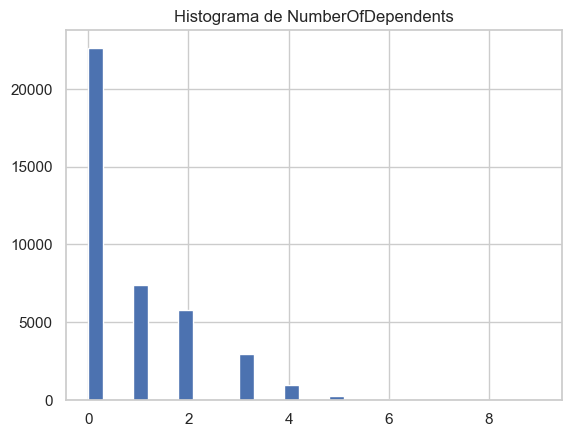

In [40]:
# 🧠 TODO: Agregar histograma por variable (para tarea)
for col in df.columns:
     if col != "SeriousDlqin2yrs":
         plt.hist(df[col], bins=30)
         plt.title(f"Histograma de {col}")
         plt.show()

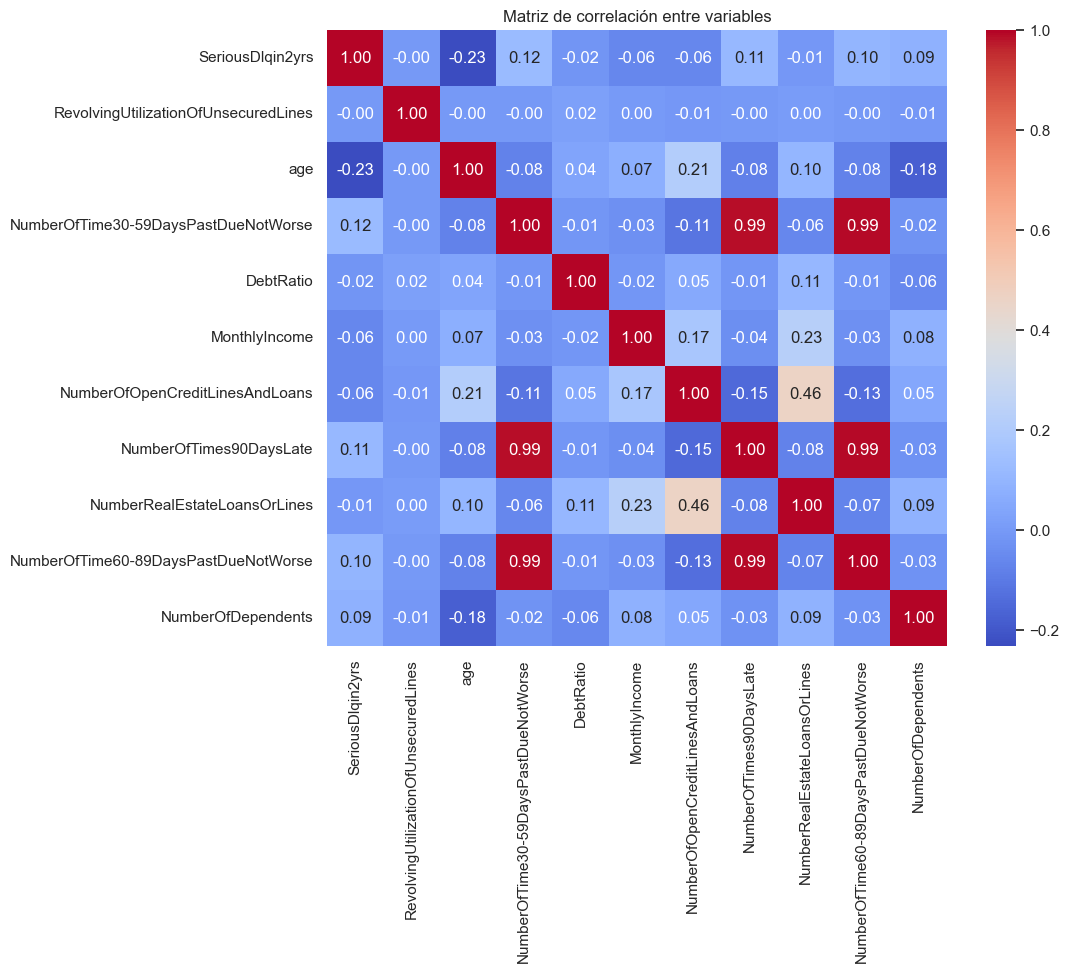

In [75]:
# 🔗 Mapa de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

# Puntos a completar en el EDA

## Parte A

### A1.- Identificar outliers o valores extremos

In [61]:
def leer_txt(path):
    """
    Carga un archivo de texto y lo devuelve como una lista de líneas.
    """
    with open(path, 'r',encoding='utf-8') as file:
        return file.read()
    
IQR = leer_txt("C:/Users/homel/OneDrive - Universidad San Sebastian/Escritorio/DeepNeuralNetworkUSS/Projects/Credit/IQR.txt")


In [62]:
exec(IQR)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(outlier_df)

,Variable,Q1,Q3,IQR,Límite inferior,Límite superior,Cantidad de outliers
4,DebtRatio,0.182940,0.868648,0.685709,-0.845623,1.897211,7696
7,NumberOfTimes90DaysLate,0.000000,0.000000,0.000000,0.000000,0.000000,7593
9,NumberOfTime60-89DaysPastDueNotWorse,0.000000,0.000000,0.000000,0.000000,0.000000,6212
10,NumberOfDependents,0.000000,1.000000,1.000000,-1.500000,2.500000,4230
3,NumberOfTime30-59DaysPastDueNotWorse,0.000000,1.000000,1.000000,-1.500000,2.500000,2984
5,MonthlyIncome,3550.000000,6812.750000,3262.750000,-1344.125000,11706.875000,2647
6,NumberOfOpenCreditLinesAndLoans,4.000000,11.000000,7.000000,-6.500000,21.500000,869
8,NumberRealEstateLoansOrLines,0.000000,2.000000,2.000000,-3.000000,5.000000,367
2,age,39.000000,59.000000,20.000000,9.000000,89.000000,120
1,RevolvingUtilizationOfUnsecuredLines,0.072469,0.941515,0.869046,-1.231099,2.245084,119


>>Comentario: Usando el análisis del rango intercuartílico, se logra identificar la cantidad de outlayer por columnas de acuerdo como se indica en la tabla superior. El atributo que más posee outlayer es el "DebtRatio" con 7696 y la que menos tiene es "RevolvingUtilizationOfUnsecuredLines" con 119. Es probable que sea necesario aplicar alguna técnica para tratar estos puntos atípicos, eliminandolos o haciendo alguna transformación logaritmica.

### A2.- Analizar la columna RevolvingUtilizationOfUnsecuredLines


In [63]:
len(df[df["RevolvingUtilizationOfUnsecuredLines"] > 1.5])  # Valores extremos en RevolvingUtilizationOfUnsecuredLines

372

> "RevolvingUtilizationOfUnsecuredLin" es la proporción del uso de líneas de crédito no aseguradas (como tarjetas de crédito). Es el total de deuda dividido por el límite de crédito.

Resumen estadístico:
Media: 4.68
Mediana (Q2): 0.44
Máximo: 29,110 (¡valor extremadamente alto!)
75% de los datos están bajo 0.94, por lo tanto valores sobre 1.5 son inusuales.

Valores > 1.5: 372 registros (casos que posiblemente sean errores o condiciones de endeudamiento altísimo).
> Recomendación: recortar o transformar valores por sobre 1.5 para evitar sesgos.


### A3.- Verificar valores inusuales en MonthlyIncome o DebtRatio

In [64]:
# Top 5 valores máximos de MonthlyIncome
top5_income = df.nlargest(5, 'MonthlyIncome')[['MonthlyIncome', 'DebtRatio']]
print("Top 5 MonthlyIncome:")
print(top5_income)

# Top 5 valores máximos de DebtRatio
top5_debt = df.nlargest(5, 'DebtRatio')[['MonthlyIncome', 'DebtRatio']]
print("\nTop 5 DebtRatio:")
print(top5_debt)

Top 5 MonthlyIncome:
       MonthlyIncome  DebtRatio
9677        699530.0   0.003698
4010        324000.0   0.176194
15498       304000.0   0.130473
8685        250000.0   0.022712
30119       250000.0   0.022712

Top 5 DebtRatio:
       MonthlyIncome  DebtRatio
28990         5443.0   326442.0
29814         5443.0   101320.0
11699         5443.0    49112.0
27186         5443.0    40362.0
33458         5443.0    38793.0


> "MonthlyIncome"es el Ingreso mensual reportado. Este atributo presenta valores extremos superiores a 30,000, y algunos incluso mayores a 600000. El top 5 de los ingresos mas altos poseen una relación de deudas muy bajo, lo cual es congruente pero forman parte de los datos atípicos del conjunto de datos.

> "DebtRatio" es la relación de deuda mensual sobre ingreso mensual bruto. Este atributo tiene valores extremadamente altos, varios superiores a 10000 e incluso 300000. Cuando vemos la relación de deudas del top 5, y se compara con el ingreso munsual, vemos que es inconsistente porque estos ingresos del top 5 vienen del proceso de imputación definido en el archivo "preprocess.py" (mean). Esto podría meter ruido al modelo.


# Parte B

### B1. ¿Qué variables parecen más correlacionadas con la clase objetivo?

>La correlación mas fuerte observada con la variable objetivo es la edad con -0232. Desde esta perspectiva, las morosidad y edad son los factores más relacionados con la probabilidad de incumplimiento.

### B2. ¿Hay variables que podrían necesitar transformación o escalamiento?

> Observando las distribuciones, variables como MonthlyIncome, DebtRatio, RevolvingUtilizationOfUnsecuredLines presentan asimetrías pronunciadas comn valores muy alejados de los rangos intercualtílicos. Es recomendable hacer transformación o escalamiento para ejecutar el modelo.

### B3. ¿Existe desbalance significativo?

In [76]:
target_counts = df["SeriousDlqin2yrs"].value_counts(normalize=True)
print("Distribución del target:")
print(target_counts)

Distribución del target:
SeriousDlqin2yrs
1    0.5002
0    0.4998
Name: proportion, dtype: float64


> Debido al preprocesamiento aplicado al dataset "cs-training.csv", no es necesario aplicar balanceo adicional ya que la variable objetivo quedó bien distribuida. 1 = 0.5002 y 0 = 0.4998

# Parte C

### C1. ¿Qué variable crees que será más relevante para predecir el default?

> Considerando la Matríz de correlaciones, existen 4 atributos que creo son relevantes para la predicción: "Edad" (-0.232), "NumberOfTime30-59DaysPastDueNotWorse" (0.12), "NumberOfTimes90DaysLate" (0.11) y "umberOfTime60-89DaysPastDueNotWorse" (0.10). Es importante resaltar, que este comentario se desprende de un ejercicio del mundo lineal. Se podría explorar un análisis de relacionamiento más amplio (lineal y no lineal), como por ejemplo un arbol de decisión, para evaluar si cambia el impacto del resto de las variales del dataset.


### C2. ¿Alguna variable presenta un comportamiento que te parezca inesperado?

> Me sorprendió el "DebtRatio" y el "MonthlyIncome" por mostrar una correlación extremadamente baja: -0,02 y -0,06 respectivamente. En lo tradicional, una proporción de deuda alta y un ingreso bajo llevarían a pensar en un muy probable default.